In [24]:
import pandas
import matplotlib.pyplot as pyplot

In [25]:
dataFrame = pandas.read_csv("./commbank-2023-Oct.csv")

In [26]:
def  parseDate(date):
    dateParts = date.split("/")
    day =  int(dateParts[0])
    month = int(dateParts[1])
    year = int(dateParts[2])
    return year * 10000 + month * 100 + day

#slice the string before the "Value" as it is a special word in commbank csv
def remove_at_value(string,substring):
    #if the string to not contain "Value" then return the string
    rtn = string.split(substring)[0]
    return rtn


In [27]:
test_str = "DLSITE TOKYO JP JPN Card xx5767 JPY 1309 Value Date: 01/08/2023,-13.98,4346.08"
print(remove_at_value(test_str,"Card"))

DLSITE TOKYO JP JPN 


In [28]:
# remove the subsequent part at purpose by "Card"
dataFrame["Purpose"] = dataFrame["Purpose"].apply(lambda x: remove_at_value(x,"Card"))

In [29]:
dataFrame.sort_values(by="Amount")

,Date,Amount,Purpose,Balance
41,16/08/2023,-80.87,TAOBAO.COM Melbourne AU AUS,3946.45
55,12/08/2023,-69.95,STEAM PURCHASE SEATTLE HH DEU,4213.03
23,22/08/2023,-53.97,TAOBAO.COM Melbourne AU AUS,3475.06
29,22/08/2023,-49.95,eBay O*15-10432-25165 Sydney AU AUS,3641.45
39,16/08/2023,-49.05,TAOBAO.COM Melbourne AU AUS,3872.91
...,...,...,...,...
46,16/08/2023,4.09,Return TAOBAO.COM Melbourne AU AUS,4110.54
47,16/08/2023,11.56,Return TAOBAO.COM Melbourne AU AUS,4106.45
22,23/08/2023,22.42,Return TAOBAO.COM Melbourne AU AUS,3497.48
21,23/08/2023,31.55,Return TAOBAO.COM Melbourne AU AUS,3529.03


/var/folders/sr/tdwnvzzx0sv_j7rcpm879j4w0000gn/T/ipykernel_83192/2969802704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_sum = dataFrame.groupby("Purpose").sum().sort_values(by="Amount")


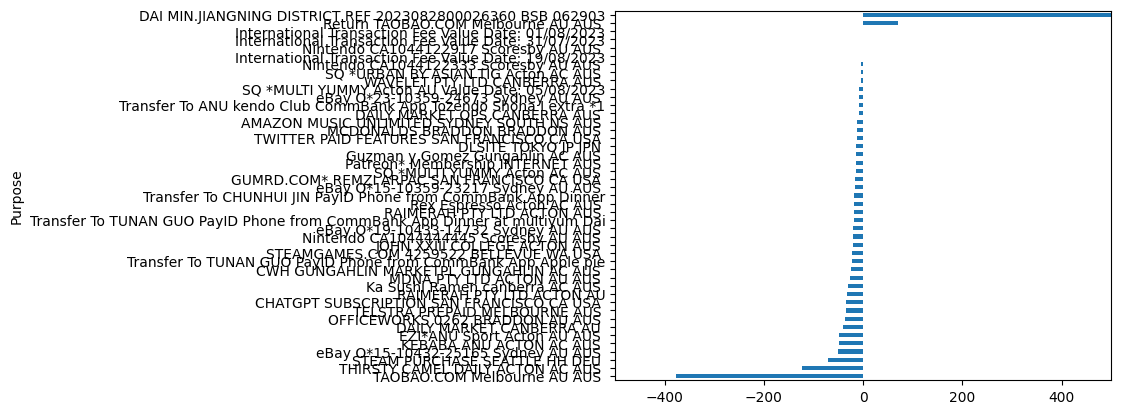

In [42]:
#proide sum by the purpose in the data frame
grouped_sum = dataFrame.groupby("Purpose").sum().sort_values(by="Amount")
grouped_sum.to_csv("./grouped_sum.csv")
grouped_sum["Amount"].plot.barh(xlim=(-500,500)).figure.savefig("./grouped_sum.png")